Compute the Jacobian of Equations 15 and 16
==

In [1]:
from __future__ import division

In [16]:
import sympy
sympy.init_printing()
v_p, v_ps, v_r, Phi, lambd, v, phi = sympy.symbols('v_p, v_ps, v_r, Phi, lambda, v, phi')
lambd

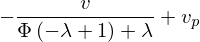

In [17]:
f1 = v_p - v/(lambd + (1 - lambd) * Phi)
f1

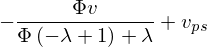

In [18]:
f2 = v_ps - (Phi * v)/(lambd + (1 - lambd) * Phi)
f2

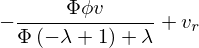

In [19]:
f3 = v_r - (phi * Phi * v)/(lambd + (1 - lambd) * Phi)
f3

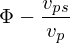

In [21]:
f4 = Phi - v_ps/v_p
f4

In [31]:
sympy.solve([f1, f2, f3, f4], [v_p, v_ps, v_r, Phi])

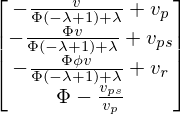

In [29]:
F = sympy.Matrix([f1,f2, f3, f4])
F

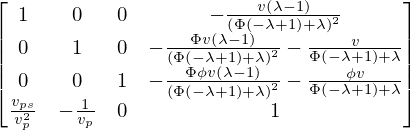

In [30]:
F.jacobian([v_p, v_ps, v_r, Phi])

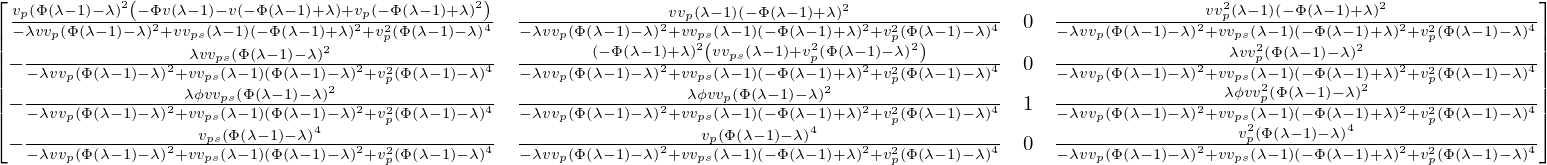

In [36]:
sympy.simplify(F.jacobian([v_p, v_ps, v_r, Phi]).inv())

In [37]:
sympy.init_printing(False)
F.jacobian([v_p, v_ps, v_r, Phi])

Matrix([
[          1,      0, 0,                                              -v*(lambda - 1)/(Phi*(-lambda + 1) + lambda)**2],
[          0,      1, 0,         -Phi*v*(lambda - 1)/(Phi*(-lambda + 1) + lambda)**2 - v/(Phi*(-lambda + 1) + lambda)],
[          0,      0, 1, -Phi*phi*v*(lambda - 1)/(Phi*(-lambda + 1) + lambda)**2 - phi*v/(Phi*(-lambda + 1) + lambda)],
[v_ps/v_p**2, -1/v_p, 0,                                                                                            1]])